In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load the data
metrics_df = pd.read_csv('./Data/2023/stanford_2023_advancedmetrics_altered.csv')
gamestats_df = pd.read_csv('./Data/2023/stanford_2023_gamestats_altered.csv')
lines_df = pd.read_csv('./Data/2023/stanford_2023_lines_altered.csv')

# Combine relevant data into a single DataFrame, aligned by week
data_df = pd.concat([metrics_df, gamestats_df, lines_df], axis=1)

# MDP parameters
actions = ['bet', 'no_bet']
bet_amount = 100  # Fixed amount to bet each week

# Initialize variables
total_reward = 0  # Track total profit or loss
rewards = []      # Record reward outcomes for each week

# Define the reward function based on the bet outcome and odds
def reward(action, odds, outcome):
    if action == 'bet':
        if outcome > 0:  # Win scenario
            if odds > 0:
                return bet_amount * (odds / 100)  # Positive odds (e.g., +150)
            else:
                return bet_amount * (100 / abs(odds))  # Negative odds (e.g., -150)
        else:
            return -bet_amount  # Loss scenario, lose full $100
    return 0  # No reward if no bet

# Function to extract Stanford's moneyline odds and determine game outcome
def get_stanford_moneyline_and_outcome(row):
    if row['HomeTeam'] == 'Stanford':
        odds = row['HomeMoneyline']
        outcome = 1 if row['HomeScore'] > row['AwayScore'] else -1  # 1 if win, -1 if loss
    elif row['AwayTeam'] == 'Stanford':
        odds = row['AwayMoneyline']
        outcome = 1 if row['AwayScore'] > row['HomeScore'] else -1  # 1 if win, -1 if loss
    else:
        odds, outcome = None, None  # This case shouldn't happen based on your dataset
    return odds, outcome

# Simulate sequential decision-making through the season
for week in range(1, len(data_df)):
    current_state = data_df.iloc[:week]  # Include data up to the current week
    next_state = data_df.iloc[week]
    
    # Extract Stanford's moneyline odds and determine outcome for this week
    odds, outcome = get_stanford_moneyline_and_outcome(next_state)
    
    if odds is None:
        print(f"Week {week}: Stanford did not play this game.")
        continue  # Skip to the next week if Stanford did not play
    
    # For now, just choose randomly (replace with policy later)
    action = np.random.choice(actions)
    
    # Calculate the reward for this week's action
    week_reward = reward(action, odds, outcome)
    total_reward += week_reward
    rewards.append(total_reward)
    
    # Log action and reward for analysis
    print(f"Week {week}: Action: {action}, Odds: {odds}, Outcome: {outcome}, Reward: {week_reward}")

print("Total Reward:", total_reward)

Week 1: Action: bet, Odds: 1600.0, Outcome: -1, Reward: -100
Week 2: Action: no_bet, Odds: 290.0, Outcome: -1, Reward: 0
Week 3: Action: no_bet, Odds: 1200.0, Outcome: -1, Reward: 0
Week 4: Action: bet, Odds: 340.0, Outcome: 1, Reward: 340.0
Week 5: Action: bet, Odds: 550.0, Outcome: -1, Reward: -100
Week 6: Action: bet, Odds: 1300.0, Outcome: -1, Reward: -100
Week 7: Action: bet, Odds: 400.0, Outcome: 1, Reward: 400.0
Week 8: Action: bet, Odds: 850.0, Outcome: -1, Reward: -100
Week 9: Action: bet, Odds: 210.0, Outcome: -1, Reward: -100
Week 10: Action: no_bet, Odds: 1100.0, Outcome: -1, Reward: 0
Total Reward: 240.0


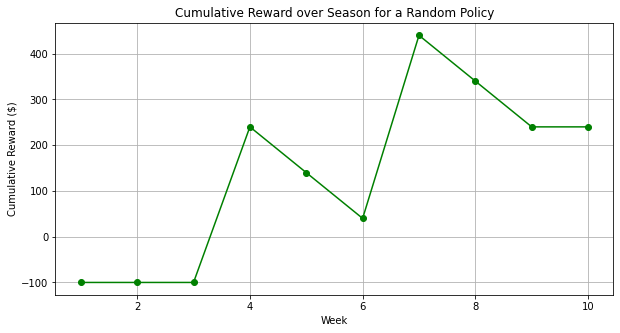

In [3]:
# Plotting cumulative reward over weeks
weeks = list(range(1, len(rewards) + 1))
plt.figure(figsize=(10, 5))
plt.plot(weeks, rewards, marker='o', linestyle='-', color='g')
plt.title("Cumulative Reward over Season for a Random Policy")
plt.xlabel("Week")
plt.ylabel("Cumulative Reward ($)")
plt.grid(True)
plt.show()